In [5]:
import sys, numpy as np
sys.path.append('../')
import parse
reload(parse)
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

---

line plots

In [6]:
def safelog10(B, noise=1e-5):
    B[B == 0] += noise
    return np.log10(B)

In [235]:
name = '../saved_states/real_data/cut_diags/hypo_tests/results-'
norm = 'True'
base = 'CDM'
paths = [name+'Split'+str(i)+base+'baseNorm'+norm+'.txt' for i in range(2, 5)]

In [236]:
singles = ['all-silh', 'euler', 'all-euler', 'silh-euler']
doubles = ['indiv_silh', 'indiv-euler', 'contour', 'global-kde']

In [237]:
resArr = np.array([parse.parse(f) for f in paths])

In [238]:
def prepare1d(resArr, key):
    obj = np.array([[r[key][i] for r in resArr] for i in range(len(resArr[0][key]))])
    return obj

def prepare2d(resArr, key, dim):
    newArr = np.array([r[key][:,dim] for r in resArr])
    obj = np.array([[r[i] for r in newArr] for i in range(len(newArr[0]))])
    return obj

In [239]:
bighash = {}
for characteristic in singles:
    bighash[characteristic] = prepare1d(resArr, characteristic)

In [240]:
for characteristic in doubles:
    for dim in [0,1,2]:
        bighash[characteristic+'-dim-'+str(dim)] = prepare2d(resArr, characteristic, dim)

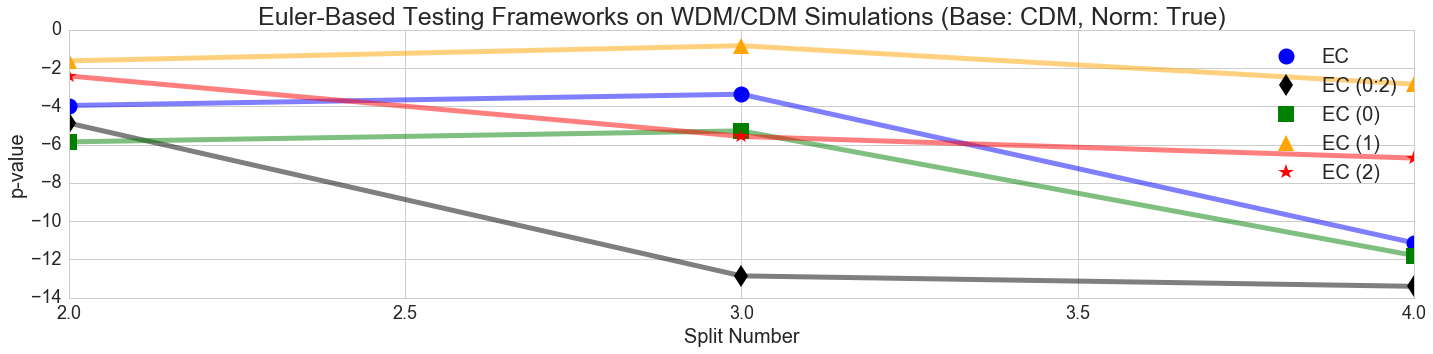

In [241]:
xvalues = np.array([2, 3, 4])
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
plt.title('Euler-Based Testing Frameworks on WDM/CDM Simulations (Base: %s, Norm: %s)' % (base, norm), fontsize=25)
plt.ylabel('p-value', fontsize=20)
plt.xlabel('Split Number', fontsize=20)

allkeys = ['euler', 'all-euler', 'indiv-euler-dim-0', 'indiv-euler-dim-1', 'indiv-euler-dim-2']
allticks = ['EC', 'EC (0:2)', 'EC (0)', 'EC (1)', 'EC (2)']
allcolors = ['b', 'k', 'g', 'orange', 'r']
allshapes = ['o', 'd', 's', '^', '*']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    graph, = plt.plot(xvalues, np.log10(np.exp(bighash[k][0])), s, color=c, markersize=16, label=t)
    allgraphs.append(graph)
plt.legend(allticks, fontsize=20)

for k, c, s in zip(allkeys, allcolors, allshapes):
    _, plt.plot(xvalues, np.log10(np.exp(bighash[k][0])), color=c, markersize=30, alpha=0.5, linewidth=5.0)

plt.tight_layout()
plt.savefig("/Users/grub/Desktop/wdmcdm_euler_lineplot_log10_base_%s_norm_%s.pdf" % (base, norm), bbox_inches='tight')
plt.show()

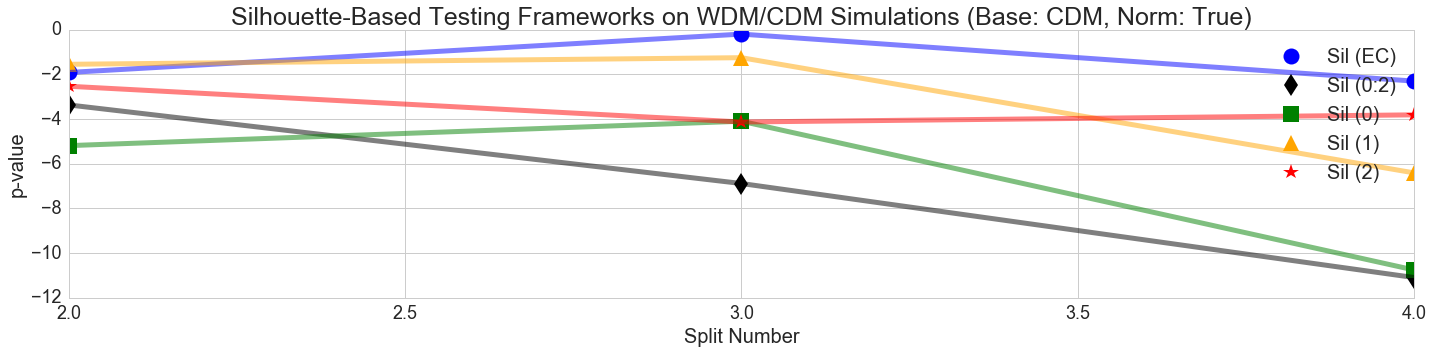

In [242]:
xvalues = np.array([2, 3, 4])
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
plt.title('Silhouette-Based Testing Frameworks on WDM/CDM Simulations (Base: %s, Norm: %s)' % (base, norm), fontsize=25)
plt.ylabel('p-value', fontsize=20)
plt.xlabel('Split Number', fontsize=20)

allkeys = ['silh-euler', 'all-silh', 'indiv_silh-dim-0', 'indiv_silh-dim-1', 'indiv_silh-dim-2']
allticks = ['Sil (EC)', 'Sil (0:2)', 'Sil (0)', 'Sil (1)', 'Sil (2)']
allcolors = ['b', 'k', 'g', 'orange', 'r']
allshapes = ['o', 'd', 's', '^', '*']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    graph, = plt.plot(xvalues, np.log10(np.exp(bighash[k][0])), s, color=c, markersize=16, label=t)
    allgraphs.append(graph)
plt.legend(allticks, fontsize=20)

for k, c, s in zip(allkeys, allcolors, allshapes):
    _, plt.plot(xvalues, np.log10(np.exp(bighash[k][0])), color=c, markersize=30, alpha=0.5, linewidth=5.0)

plt.tight_layout()
plt.savefig("/Users/grub/Desktop/wdmcdm_silh_lineplot_log10_base_%s_norm_%s.pdf" % (base, norm), bbox_inches='tight')
plt.show()

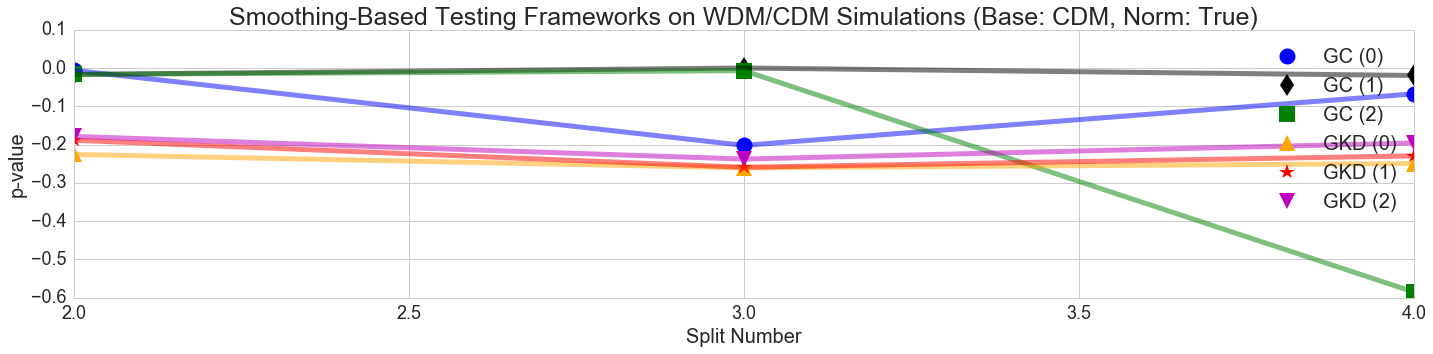

In [221]:
xvalues = np.array([2, 3, 4])
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
plt.title('Smoothing-Based Testing Frameworks on WDM/CDM Simulations (Base: %s, Norm: %s)' % (base, norm), fontsize=25)
plt.ylabel('p-value', fontsize=20)
plt.xlabel('Split Number', fontsize=20)

allkeys = ['contour-dim-0', 'contour-dim-1', 'contour-dim-2', 'global-kde-dim-0', 'global-kde-dim-1', 'global-kde-dim-2']
allticks = ['GC (0)', 'GC (1)', 'GC (2)', 'GKD (0)', 'GKD (1)', 'GKD (2)']
allcolors = ['b', 'k', 'g', 'orange', 'r', 'm']
allshapes = ['o', 'd', 's', '^', '*', 'v']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    tmpplotme = safelog10(np.exp(bighash[k][0]))
    tmp2plotme = np.log(np.exp(bighash[k][0]))
    tmpboolme = np.isinf(tmp2plotme)
    graph, = plt.plot(xvalues[~tmpboolme], tmpplotme[~tmpboolme], s, color=c, markersize=16, label=t)

plt.legend(allticks, fontsize=20)

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    tmpplotme = safelog10(np.exp(bighash[k][0]))
    tmp2plotme = np.log(np.exp(bighash[k][0]))
    tmpboolme = np.isinf(tmp2plotme)
    graph, = plt.plot(xvalues[tmpboolme], tmpplotme[tmpboolme], s, color=c, markersize=25, 
                      markeredgewidth=2, markeredgecolor=c, markerfacecolor='None')

for k, c, s in zip(allkeys, allcolors, allshapes):
    _, plt.plot(xvalues, safelog10(np.exp(bighash[k][0])), color=c, markersize=30, alpha=0.5, linewidth=5.0)

plt.tight_layout()
plt.savefig("/Users/grub/Desktop/wdmcdm_smooth_lineplot_log10_base_%s_norm_%s.pdf" % (base, norm), bbox_inches='tight')
plt.show()

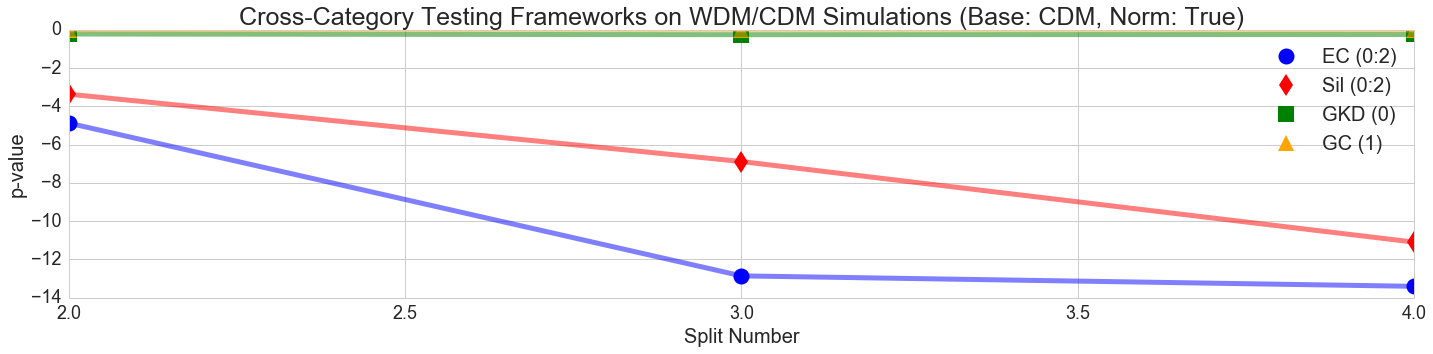

In [222]:
xvalues = np.array([2, 3, 4])
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
plt.title('Cross-Category Testing Frameworks on WDM/CDM Simulations (Base: %s, Norm: %s)' % (base, norm), fontsize=25)
plt.ylabel('p-value', fontsize=20)
plt.xlabel('Split Number', fontsize=20)

allkeys = ['all-euler', 'all-silh', 'global-kde-dim-0', 'contour-dim-1']
allticks = ['EC (0:2)', 'Sil (0:2)', 'GKD (0)', 'GC (1)']
allcolors = ['b', 'r', 'g', 'orange']
allshapes = ['o', 'd', 's', '^']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    tmpplotme = safelog10(np.exp(bighash[k][0]), noise=1e-35)
    tmp2plotme = np.log(np.exp(bighash[k][0]))
    tmpboolme = np.isinf(tmp2plotme)
    graph, = plt.plot(xvalues[~tmpboolme], tmpplotme[~tmpboolme], s, color=c, markersize=16, label=t)

plt.legend(allticks, fontsize=20)

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    tmpplotme = safelog10(np.exp(bighash[k][0]), noise=1e-35)
    tmp2plotme = np.log(np.exp(bighash[k][0]))
    tmpboolme = np.isinf(tmp2plotme)
    graph, = plt.plot(xvalues[tmpboolme], tmpplotme[tmpboolme], s, color=c, markersize=25, 
                      markeredgewidth=2, markeredgecolor=c, markerfacecolor='None')

for k, c, s in zip(allkeys, allcolors, allshapes):
    _, plt.plot(xvalues, safelog10(np.exp(bighash[k][0]), noise=1e-35), color=c, markersize=30, alpha=0.5, linewidth=5.0)

plt.tight_layout()
plt.savefig("/Users/grub/Desktop/wdmcdm_cross_lineplot_log10_base_%s_norm_%s.pdf" % (base, norm), bbox_inches='tight')
plt.show()

---

Heatmap plotting

In [66]:
singles = []
doubles = []
triples = []
quadruples = []

In [101]:
singles = np.array([0.646992883717662 for i in range(64)])

In [112]:
doubles = np.array([0.6606265007071, 0.864537891450275, 0.731853027664854, 0.670042880320786, 0.795052102112559, 0.8074728158318, 0.835533669616858, 0.711566977649133])

In [113]:
triples = np.array([0.743566553421431, 0.285710682655694, 0.697779129748716, 0.729920968772013, 0.804616663409447, 0.960533277321407, 0.670649266295424, 0.447968106103432, 0.381133115806497, 0.915803123824751, 0.847816447839166, 0.000852092769943913, 0.679006426190927, 0.845284401812872, 0.971149221513661, 0.92895216379754, 0.163910271971024, 0.867928616648616, 0.510629245957942, 0.277974142133313, 0.928287729232362, 0.977957626013099, 0.935627588728943, 0.735522576504857, 0.705111948768038, 0.979316559047426, 0.932103236031088])

In [114]:
quadruples= np.array([0.990717565834961, 0.2689900450014, 0.808506349751861, 0.961905874505512, 0.282601324217489, 0.916926045116791, 0.89606793880541, 0.973838076149417, 0.957086672670363, 0.992260885423989, 0.985681313102099, 0.276448237829034, 0.0381905347838744, 0.993208696282179, 0.965431404375258, 0.928301408162122, 0.862871983894373, 0.500464635084604, 0.804655230996887, 0.328971453043369, 0.14013099601542, 0.0364710112447194, 0.952637512471151, 0.931182440057531, 0.984624602884428, 0.421993590772394, 0.776342251115382, 0.528053221674543, 0.129103946472568, 0.944937910791762, 0.960260880265551, 0.831087922982085, 0.922449592915227, 0.120951636891691, 0.0299673921349647, 0.424930166214334, 0.999869189013335, 0.986603204018371, 0.879992543244671, 0.574135935145261, 0.969938733794156, 0.960004242325644, 0.984488343925418, 0.935991925916341, 0.903664290747459, 0.422449234180867, 0.9804930983246, 0.858222219499572, 0.711304065672768, 0.799994428686246, 0.946141760372124, 0.547877370120475, 0.970324342161613, 0.809659896249763, 0.975063485031547, 0.955623896975721, 0.999229145242814, 0.952941886033547, 0.99641432280613, 0.506043376734664, 0.802521708939507, 0.991248724753166, 0.932002366807306, 0.0445594896287685])

In [88]:
singles.shape, doubles.shape, triples.shape, quadruples.shape

((1728,), (1728,), (1728,), (1728,))

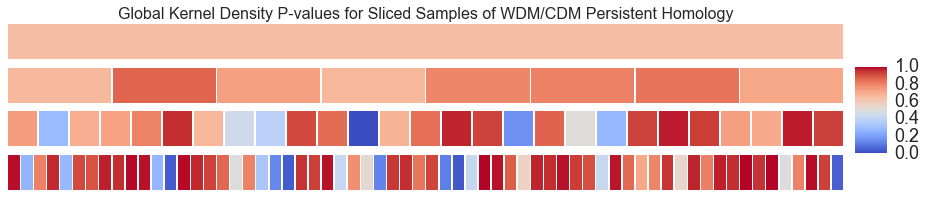

In [187]:
fig, axn = plt.subplots(4, 1, sharey=True, figsize=(15,3))
axn[0].set_title('Global Kernel Density P-values for Sliced Samples of WDM/CDM Persistent Homology', fontsize=16)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
sns.heatmap([[0.646992883717662]], ax=axn.flat[0], vmin=0, vmax=1, xticklabels=False, cmap="coolwarm", cbar=False)
sns.heatmap([doubles], ax=axn.flat[1], vmin=0, vmax=1, xticklabels=False, yticklabels=False, cmap="coolwarm", cbar=False)
sns.heatmap([triples], ax=axn.flat[2], vmin=0, vmax=1, xticklabels=False, yticklabels=False, cmap="coolwarm", cbar=False)
sns.heatmap([quadruples], ax=axn.flat[3], vmin=0, vmax=1, xticklabels=False, yticklabels=False, cmap="coolwarm", cbar_ax=cbar_ax)
plt.savefig("/Users/grub/Desktop/heatmap_dispersion.pdf", bbox_inches='tight')
plt.show()

In [189]:
np.argsort(quadruples)

array([34, 21, 12, 63, 33, 28, 20,  1, 11,  4, 19, 25, 45, 35, 17, 59, 27,
       51, 39, 48, 26, 49, 60, 18,  2, 53, 31, 47, 16, 38,  6, 44,  5, 32,
       15, 23, 62, 43, 29, 50, 22, 57, 55,  8, 41, 30,  3, 14, 40, 52,  7,
       54, 46, 42, 24, 10, 37,  0, 61,  9, 13, 58, 56, 36])

worked!

In [1]:
import numpy as np
data = np.load('/Users/mikewu/Desktop/Research/persist-homology/saved_states/wdm_cdm_rds/dists.npy')

In [2]:
data_dim_0 = data[:, :, 0]
data_dim_1 = data[:, :, 1]
data_dim_2 = data[:, :, 2]

In [3]:
def prepare(data):
    return (data[0, :1] , data[1, :8] , data[2, :27] , data[3, :64])

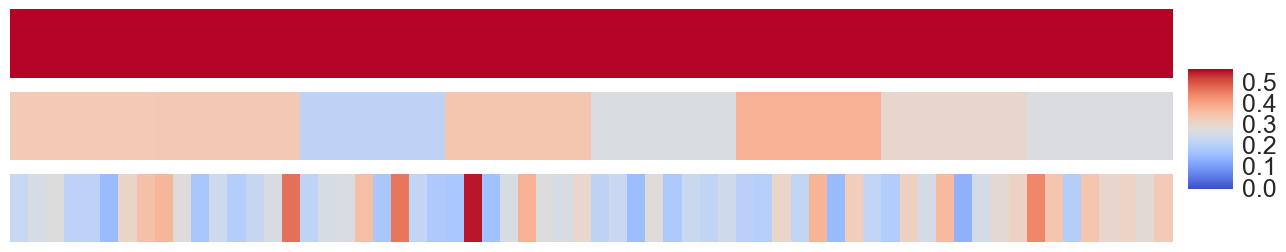

In [7]:
curdata = data_dim_2
s, d, t, q = prepare(curdata)
vmin, vmax = np.min(curdata), np.max(curdata)
fig, axn = plt.subplots(3, 1, sharey=True, figsize=(15,3))
cbar_ax = fig.add_axes([.91, .3, .03, .4])
cbar_ax.tick_params(labelsize=18) 
sns.heatmap([s], ax=axn.flat[0], vmin=vmin, vmax=vmax, xticklabels=False, cmap="coolwarm", cbar=False)
sns.heatmap([d], ax=axn.flat[1], vmin=vmin, vmax=vmax, xticklabels=False, yticklabels=False, cmap="coolwarm", cbar=False)
#sns.heatmap([t], ax=axn.flat[2], vmin=vmin, vmax=vmax, xticklabels=False, yticklabels=False, cmap="coolwarm", cbar=False)
sns.heatmap([q], ax=axn.flat[2], vmin=vmin, vmax=vmax, xticklabels=False, yticklabels=False, cmap="coolwarm", cbar_ax=cbar_ax)
# plt.savefig("/Users/mikewu/Desktop/newfigs/hmap_dim2_yesnorm.pdf", bbox_inches='tight')
plt.show()

(52, 25)

In [5]:
s, d, t, q = prepare(data_dim_0)
print np.argmin(q), np.argmax(q)
s, d, t, q = prepare(data_dim_1)
print np.argmin(q), np.argmax(q)
s, d, t, q = prepare(data_dim_2)
print np.argmin(q), np.argmax(q)

58 40
23 40
52 25


#### 